# Final Project Baseline: House Prices- Advanced Regression Techniques
### Author: Radia Abdul Wahab, Parham Motameni, Jun Qian
### Date: Fall 2021
### Course: W207 Applied Machine Learning






## **Table of Contents:**

#### **Project Summary**

>Overview of Project Intention and purpose

>Project Structure

#### **Description of Data and Data source**

#### **Dataset Exploratory Analysis**

>Missing data

>Nominal data

>Categorical data

>Analysis to find important features

#### **Details of Data Manipulations**

#### **Conclusion and Furtherwork**

# Project Summary

### Overview of Project Intention and purpose

How much would you pay for a house? That is often one of the hardest questions to answer. When buying a house or selling a house, it is very crucial to determine the right pricing, since house prices change over time and each house its own "$ rating". 

Three main aspects determine the price of a house. 
1. Condition
2. Features (Number of rooms, square footage etc)
3. Location
    
 
### **Project Goals**: Through this project we are trying to answer 3 main questions:
1. What combination of aspects of a house most determines the sale-price?
2. Can Regression based prediction be used to estimate the price of the house?
3. What is the best accuracy that can be achieved by using such algorithms?
4. Are there any other ML models which can achieve a better prediction?



### Model Overview and Model Selection

**We first decided this was going to be a regression problem and not a classification problem since target variable was normally and continuously distributed and did not have distinct separated boundaries.**

#### Data, EDA, Common Functions for data set-up

>Base Regression, Decision Trees, Random Forest

>>Score

>Hyperparameter Tuning

>>Score

>Feature Selection

>>Score

>Wrapper Function

>>Score

>Neural Networks

>>Score

>PCA

>>Random Forests on Reduced Dimensions

>>>Score

# Description of Data and Data Source



These 3 properties can be defined under a large set of sub-properties. The **Ames Housing dataset** was compiled by **Dean De Cock**, with 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. This data set (https://www.kaggle.com/c/house-prices-advanced-regression-techniques) is being used for this project to demonstrate the use of various Machine Learning techniques, to be able to have the algorithm perform the difficult task of deciding what the house price should be. 

# Dataset Exploratory Analysis

**In addition to the following exploratory analysis, we also thoroughly reviewed the description.txt provided with the dataset. We also reviewed literature around this data set.**

## Import all Libraries:

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

# internal modules
from configurations import args
from data_loader import DataLoader

%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
# download data file if it is not ready
data_file = Path(args.data_path)
if data_file.is_file():
    print("Datafile is already loaded.")
else:
    !curl -L "https://drive.google.com/uc?export=download&id=1ortEJfmlpt9-dbg5f6cTDt5nicswf5wT" > 'test.csv'
    !curl -L "https://drive.google.com/uc?export=download&id=1EG5jP5RDEIsNAMaF2m42KOyz-ZVjC8wS" > 'train.csv'
data_loader = DataLoader(args)
df = data_loader.df

Datafile is already loaded.


In [3]:
# lock the seed to have repeatable results
random.seed(100)

## Taking a look at what the features are
Additionally reviewed the data_description.txt file. The column names and the names on the file correspond accurately

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1456 non-null   int64  
 1   MSSubClass     1456 non-null   int64  
 2   MSZoning       1456 non-null   object 
 3   LotFrontage    1197 non-null   float64
 4   LotArea        1456 non-null   int64  
 5   Street         1456 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1456 non-null   object 
 8   LandContour    1456 non-null   object 
 9   Utilities      1456 non-null   object 
 10  LotConfig      1456 non-null   object 
 11  LandSlope      1456 non-null   object 
 12  Neighborhood   1456 non-null   object 
 13  Condition1     1456 non-null   object 
 14  Condition2     1456 non-null   object 
 15  BldgType       1456 non-null   object 
 16  HouseStyle     1456 non-null   object 
 17  OverallQual    1456 non-null   int64  
 18  OverallC

## Check whether there are variables with significant missing values. 

It looks like PoolQC , MiscFeature, Alley, Fence, FireplaceQu, and LotFrontage have substantial missing values. 

Looking closer into the descriptions of these variables, we find most NA actually means the house does not have such feature. For example, if a value is missing from PoolQC, most likely that house doesn't even have a pool.

So we looked at the variables, to see which ones will fall under this category and fill it with "NonExist" as a distinct category.

In [5]:
missing=df.isnull().sum().sort_values(ascending=False).head(20)
missing

missing = missing[missing > 0]
percent_missing = missing * 100 / df.shape[0]
pd.concat([missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage Missing']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage Missing
PoolQC,1451,99.656593
MiscFeature,1402,96.291209
Alley,1365,93.750000
Fence,1176,80.769231
FireplaceQu,690,47.390110
LotFrontage,259,17.788462
GarageType,81,5.563187
GarageQual,81,5.563187
GarageFinish,81,5.563187
GarageCond,81,5.563187


In [6]:
# Fill missing value of 'PoolQC','MiscFeature','Alley','Fence',
# 'FireplaceQu' as NonExist. Leave LotFrontage for further investigation
df[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']]= \
    df[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']].fillna('NonExist')
missing_with_replace=df.isnull().sum().sort_values(ascending=False).head(20)
missing_with_replace


missing_with_replace = missing_with_replace[missing_with_replace > 0]
percent_missing = missing_with_replace * 100 / df.shape[0]
pd.concat([missing_with_replace, percent_missing], axis=1, 
          keys=['Missing Values After filling Non_Exist', 'Percentage Missing']).\
          sort_values(by="Missing Values After filling Non_Exist", ascending=False)

,Missing Values After filling Non_Exist,Percentage Missing
LotFrontage,259,17.788462
GarageFinish,81,5.563187
GarageCond,81,5.563187
GarageYrBlt,81,5.563187
GarageQual,81,5.563187
GarageType,81,5.563187
BsmtFinType2,38,2.609890
BsmtExposure,38,2.609890
BsmtCond,37,2.541209
BsmtFinType1,37,2.541209


We replaced "Pool, Misc Features, Alley, Fence and Fireplace". Those seemed obvious and missing values % was very high. 

However, we were on the fence (no pun intended) on the Lot Frontage. So we replaced with "NoLotFrontage"

The next top of the residual missing values were all related to Garage (GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual). All of them had the same number of missing values. And reviewing the data description it seems to us that these 81 houses did not have a garage. So we replaced them with "NoGarage"

Same for NoBasement and NoMassVnr.

In [7]:
# Fill missing value of 'PoolQC','MiscFeature','Alley','Fence',
# 'FireplaceQu' as NonExist. Leave LotFrontage for further investigation
df[['LotFrontage','GarageYrBlt','MasVnrArea','MasVnrType','GarageType',
'GarageFinish','GarageQual','GarageCond','BsmtFinType2','BsmtExposure',
'BsmtFinType1','BsmtCond','BsmtQual','Electrical']]=\
    df[['LotFrontage','GarageYrBlt','MasVnrArea','MasVnrType',
    'GarageType','GarageFinish','GarageQual','GarageCond',
    'BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond',
    'BsmtQual','Electrical']].fillna('0')
missing_with_replace=df.isnull().sum().sort_values(ascending=False).head(20)
missing_with_replace


missing_with_replace = missing_with_replace[missing_with_replace > 0]
percent_missing = missing_with_replace * 100 / df.shape[0]
pd.concat([missing_with_replace, percent_missing], axis=1, 
          keys=['Missing Values After filling Non_Exist', 'Percentage Missing']).\
          sort_values(by="Missing Values After filling Non_Exist", ascending=False)

,Missing Values After filling Non_Exist,Percentage Missing


## Outlier Removal

For our Outlier assessment, we looked at scatter plots

We saw about 5 data points that seemed "visually" as outliers. 

So we decided to investigate further. Our success was reading the "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project" by Dean De Cock (2011). The creater of this dataset. He suggests that these 5 outliers are valid outliers and can be removed in the following process:

*Potential Pitfalls (Outliers): Although all known errors were corrected in the data, no observations have been removed due to unusual values and all final residential sales from the initial data set are included in the data presented with this article. There are five observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will quickly indicate these points). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students.--De Cock 2021*

We found this information to be helpful. We used his input to remove the outliers accordingly.

In [8]:
df_outL=df[df["GrLivArea"] < 4000]

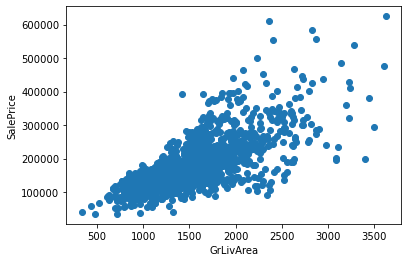

In [9]:
plt.scatter(x=df_outL['GrLivArea'], y=df_outL['SalePrice'])
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice")
plt.show()

## Split training data into our own train and test data



#### The "test.csv" is an unlabelled set. Therefore in order to assess performance we are splitting the train.csv into our own training, development and test set as needed
#### We are using split() to ensure random distribution of data points
#### We are starting off with ~10% of the train set into a test group

In [10]:
# Create train, dev, test datasets

# split data into Test and train
X_train, X_test, y_train, y_test = train_test_split(
    data_loader.df_X, data_loader.df_y, test_size= 0.10, random_state=1)

print(f'X_train size: {X_train.shape}, X_test size: {X_test.shape}')
print(f'y_train size: {y_train.shape}, y_test size: {y_test.shape}')
X_train.head()

X_train size: (1310, 79), X_test size: (146, 79)
y_train size: (1310, 1), y_test size: (146, 1)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
498,20,RL,65.0,7800,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal
721,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
177,50,RL,NaN,13650,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
585,20,RL,88.0,11443,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2006,New,Partial
1394,120,RL,53.0,4045,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,10,2006,New,Partial


Above result shows that
1.  The **train** set has **1310** records (1310 labelled houses)
2.  The **test** set has **146 long** records (146 labelled houses)
3.  Each house has **79 features**. 
4.  Features are a mix of **nominal, ordinal, and categorical**
5.  We will have to be cognisant of the different data types for our assessments

## Analysis on SalePrice

For SalePrice,  we use the mean price and variation range to determine whether we should seperate the sales price into before and after financial crisis. The observations are:
1. We do see a trend change from upward to decrease/flat in price 


2. However, the difference is only around 5% with a similar variation. As a result, in this stage, we keep it as is for cross sectional analysis. We might look into it further later.


3. We identified that in some months the sales price were significantly higher

In [11]:
# try to explore the impact of financial crisis to house prices#
df_train=y_train.merge(X_train, how="inner",left_index=True,right_index=True)
df_train[['SalePrice','YrSold']].groupby(['YrSold']).mean()

,SalePrice
YrSold,
2006,181748.758865
2007,181477.110368
2008,177107.368794
2009,181316.277592
2010,177398.810811


Text(0.5, 1.0, 'Sale Price Normality Evaluation')

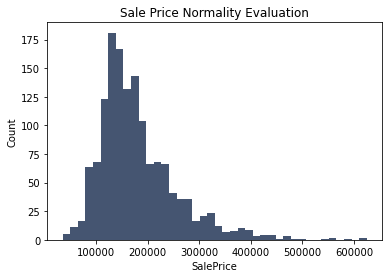

In [12]:
#Overall Saleprice distribution (Target variable should be a normally distributed variable)

sns.distplot(df['SalePrice'], kde=False, color="#172B4D", hist_kws={"alpha": 0.8})
plt.ylabel("Count")
plt.title("Sale Price Normality Evaluation")

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

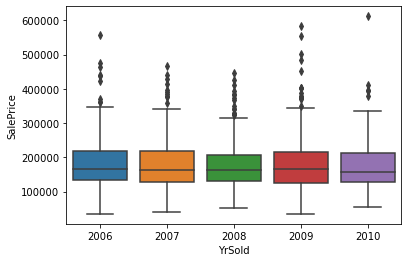

In [13]:
sns.boxplot(x= df_train['YrSold'], y= df_train['SalePrice'])

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

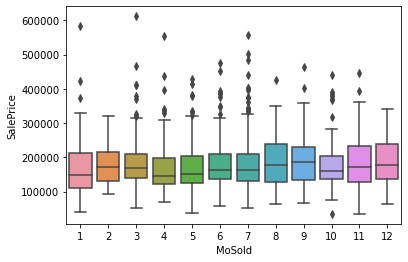

In [14]:
df_train[['SalePrice','MoSold']].groupby(['MoSold']).mean()
sns.boxplot(x= df_train['MoSold'], y= df_train['SalePrice'])

In [15]:
#pass training dataset to a sepearate EDA dataframe
df_EDA=y_train.merge(X_train, how="inner",left_index=True,right_index=True)

## First step exploratory data analysis

We classify the features into two types of variables: Numerical and Categorical. 

For all the numerical variables, we plot the correlations heatmap between the dependent variable SalePrice and all the features. 




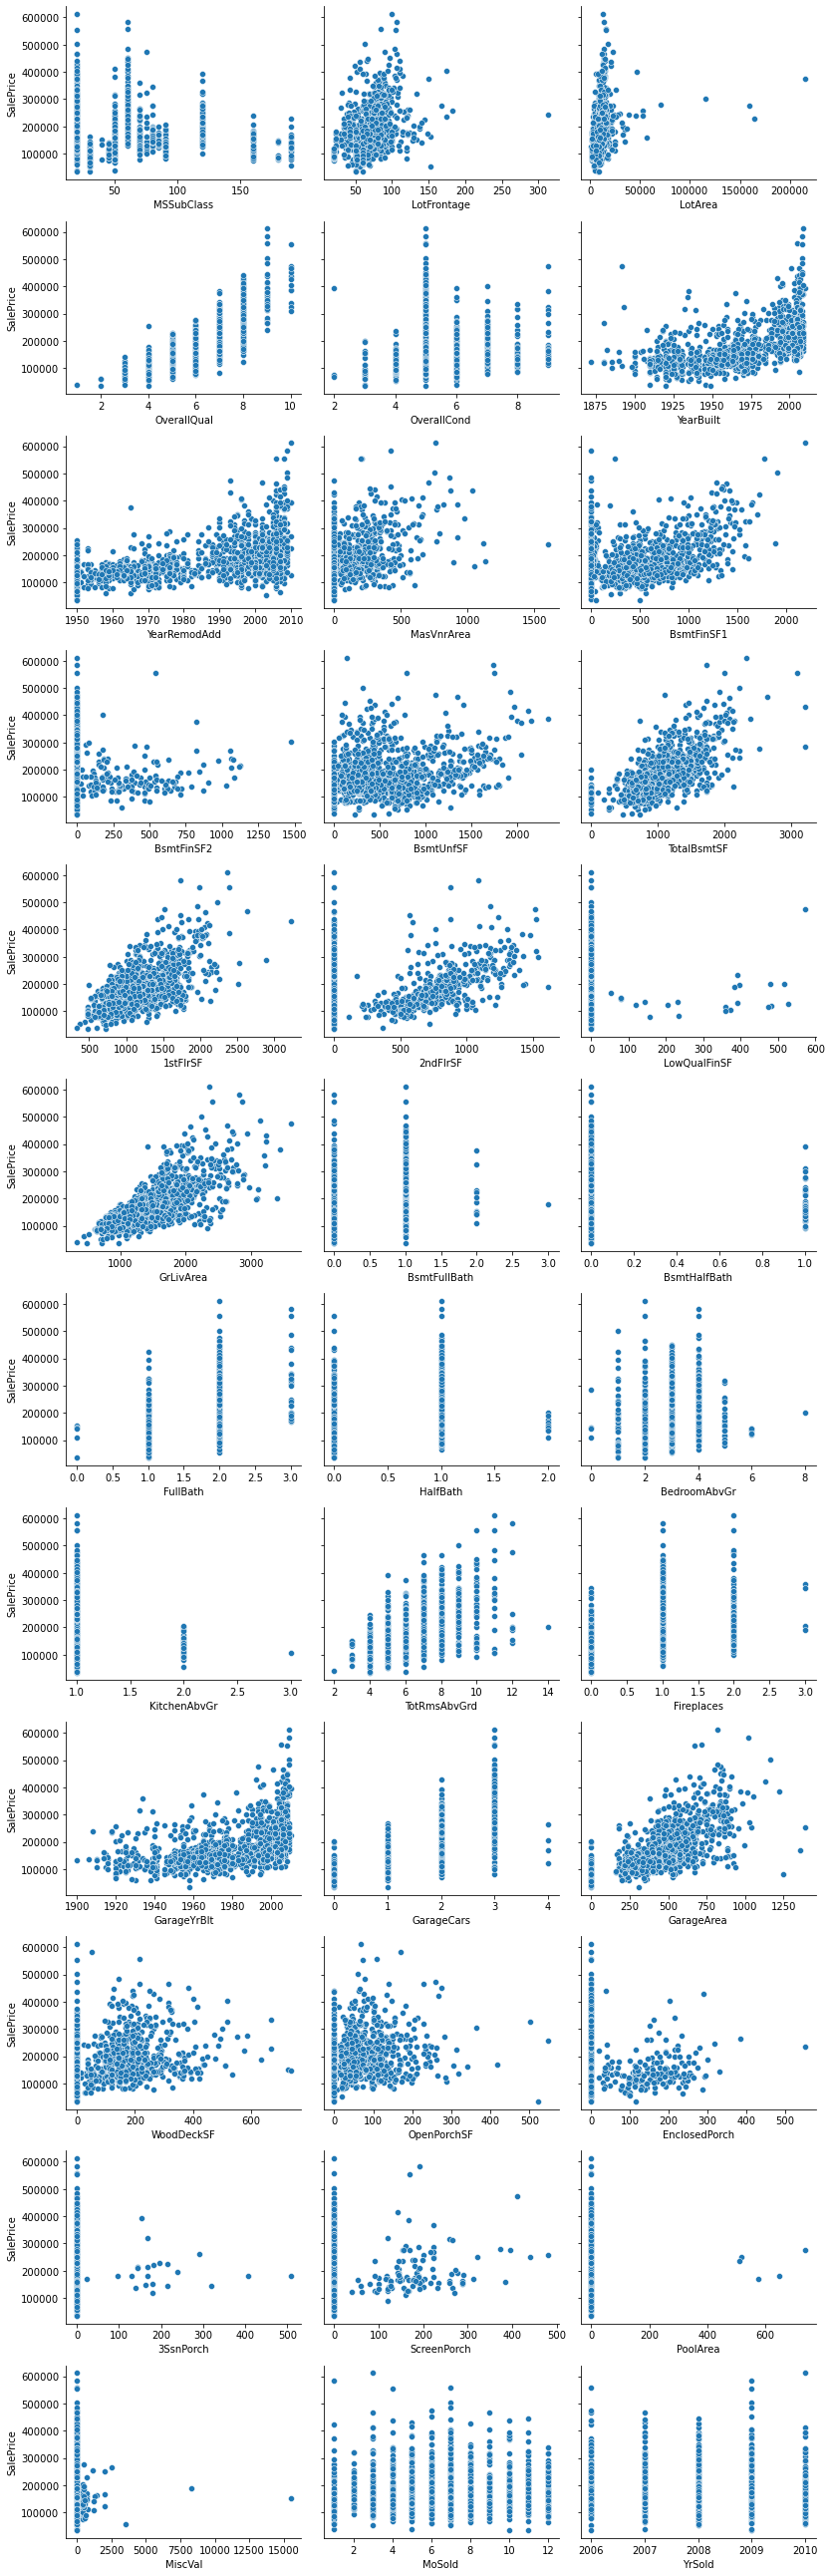

In [16]:
# Using the shortlisted feature list, run a for loop to plot all the data points
# int_feature_list has been created a few cells above
# int_feature_list contains all the columns that have some sort of numbers in them (int, float etc)
def plot_numerical_scatter_plots():

    ## all numeric variables##
    df_num_list = df_EDA.select_dtypes(exclude={'object'}).columns.to_list()
    df_num_list.remove('SalePrice')
    g = sns.FacetGrid(pd.DataFrame(df_num_list), col=0, col_wrap=3, aspect=1.3,
    sharex=False)
    for ax, x_var in zip(g.axes, df_num_list):
        sns.scatterplot(data=df_EDA, x=x_var, y='SalePrice', ax=ax)
    g.tight_layout()
    
plot_numerical_scatter_plots()

### In this section we review ALL the variables with the plots above as well as the description provided to us in data_description.txt



1. **MSSubClass**: Identifies the type of dwelling involved in the sale.

Need to convert this to categorical, or ordinal. For Baseline we will not be using this. In terms of conversion to ordinal, this is not ordered currently. We will need to identify what criteria should be used to order these. However, this variable determines the type of property and is ultimately a critical feature that needs to be captured in the final ML algorithm.

2. **LotFrontage**: Linear feet of street connected to property

Need to remove values above 200. They are clearly outliers that are skewing the data on the right

Once we remove the outliers, we should see a good correlation, visually

3. **LotArea**: Lot size in square feet

This is an important parameter

However, looking at the scatter plot, I would say there are a few outliers that significantly skew the data

we should remove any values that are >50K and perform our final analysis.

Once we remove the outliers above 50k, we should get a reasonable correlation

4. **OverallQual**: Rates the overall material and finish of the house

Similar to the MSSubClass, this is actually a ordinal variable with a numerical rating. 

From the description.txt, it seems like it is ordered in the right way. 

5. **OverallCond**: Rates the overall condition of the house

Same feedback as OverallQual

6. **YearBuilt**: Original construction date

Can be used as-is for now. Keeping in mind, this is a time variable

7. **YearRemodAdd**: Remodel date (same as construction date if no remodeling or additions)

This is a tricky parameter. we need to figure out what to do with the data points where the house was not remodeled but is copying the construction date

Looking at the scatter plot, rest of the data points seem good. My only concern is the piling up of data on 1950

Also need to keep in mind this is a time variable

8. **MasVnrArea**: Masonry veneer area in square feet
Need to remove zero value 

Asses with  vs without Masonry veneer (consider using as binary variable in the final ML)
Then if with Masonry veneer, perform correlation assessment. 

9. **BsmtFinSF1**: Type 1 finished square feet
Need to remove zero values

Asses with basement vs without (consider using binary assessment)
Then if with basement, need to remove '0' values and perform correlation

10. **BsmtFinSF1**: Type 1 finished square feet, **BsmtFinSF2**: Type 2 finished square feet, **BsmtUnfSF**: Unfinished square feet of basement area. **TotalBsmtSF**: Total square feet of basement area

Remove zeros
Identify creative ways to combine these variables into one, and use some form of a rating to convert into ordinal to perform assessment. Or use decision tree.

11. **1stFlrSF**: First Floor square feet, **2ndFlrSF**: Second floor square feet

Perform assessment on total square feet.

For second floor square feet, remove the zero values

12. **LowQualFinSF**: Low quality finished square feet (all floors)

This to me should be a binary classifier. There is a vertical line on zero, and all other data points can be represented with almost a horizontal line

13. **GrLivArea**: Above grade (ground) living area square feet

Destribution of data point is almost identical to 1stFlrSF. This is not a suprise. I don't think we should include this variable. This will diminish the effects of the original variable (1stFlrSF or overall SF)

14. **BsmtFullBath**: Basement full bathrooms, **BsmtHalfBath**: Basement half bathrooms, **FullBath**: Full bathrooms above grade, **HalfBath**: Half baths above grade

All bathroom formats should be combined into a ordinal format. Need to figure out how. we could do it based on mean. The higher the mean sale price, higher the ordinal value.

15. **Bedroom**: Bedrooms above grade (does NOT include basement bedrooms), **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

Traditionally, this is a huge contributing factor. Lets see how we can capture this

Need to combine Bedrooms and total room somehow

Decision tree might be a good option for this

16. **Kitchen**: Kitchens above grade

Very interesting distribution. seems to be a negative correlation

17. **Fireplaces**: Number of fireplaces

I think we can deprioritize this variable for now, but include in final ML

18. **GarageYrBlt**: Year garage was built

This is an important variable. Can use as is. But need to remove zeroes

19. **GarageCars**: Size of garage in car capacity

important variable. looks like good correlation

20. **GarageArea**: Size of garage in square feet

Good variable. Need to remove zeroes

21. **WoodDeckSF**: Wood deck area in square feet, **OpenPorchSF**: Open porch area in square feet, **EnclosedPorch**: Enclosed porch area in square feet, **3SsnPorch**: Three season porch area in square feet, **ScreenPorch**: Screen porch area in square feet, **PoolArea**: Pool area in square feet

These can be combined into some "additional amenities". can keep the sqft measure. need to decide

In any case, need to remove zeroes. 

22. **MiscVal**: $Value of miscellaneous feature

Need to figure out how we can include this. I dont think we can add the value to the total. because value of misc features might actually hold lesser real value.

will deprioritize this for now and think about it. 

23. **MoSold**: Month Sold (MM), **YrSold**: Year Sold (YYYY):

Effects of year seems to be limited. Month to Month variability is more significant.

### Second pass all the categorical variables

we plot the box plots to see whether any category in the variable has a significant different SalePrice. We conclude as below:

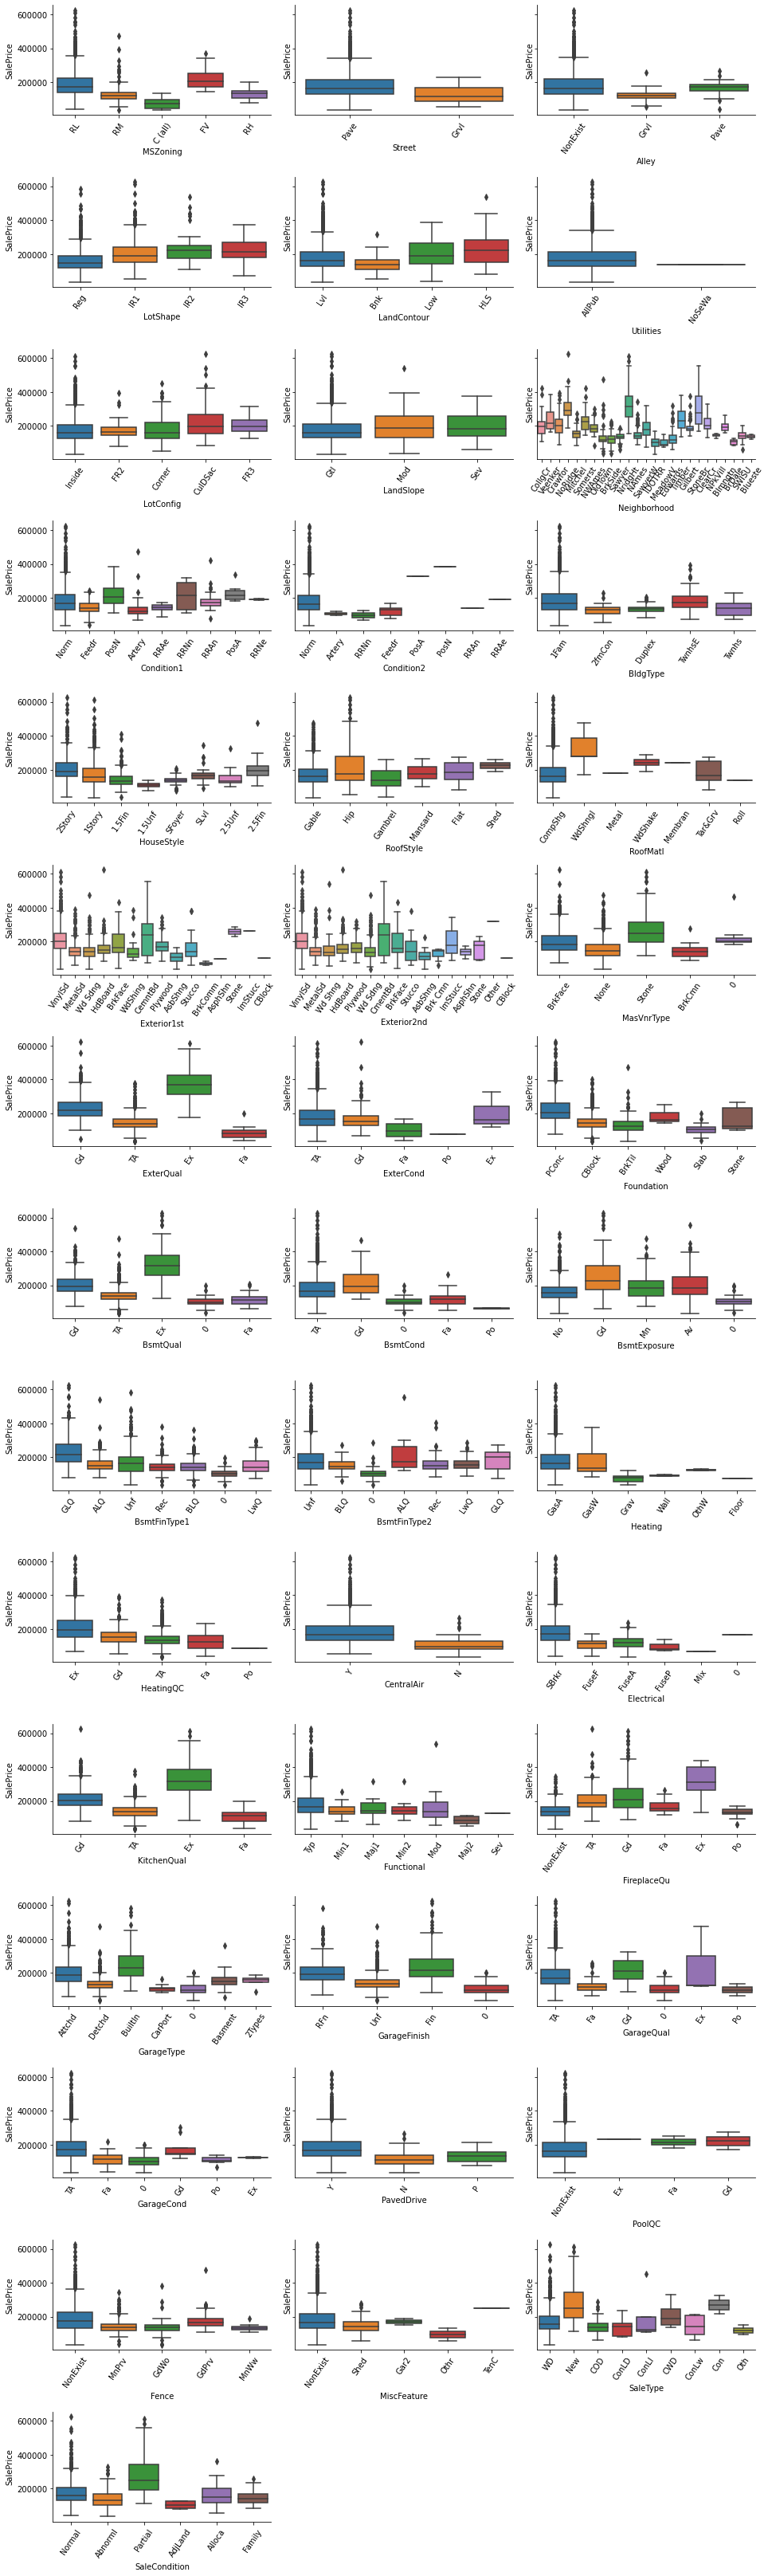

In [17]:
#box plot to explore categorical variables
def plot_categorical_boxplots():
    #all text variable (categorical)#
    df_txt_list=df_EDA.select_dtypes(include={'object'}).columns.to_list()
    g = sns.FacetGrid(pd.DataFrame(df_txt_list), col=0, col_wrap=3, aspect=1.5,
        sharex=False, sharey=True)
    for ax, x_var in zip(g.axes, df_txt_list):
        sns.boxplot(data=df, x=x_var, y='SalePrice', ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=55)
    g.tight_layout()
    

plot_categorical_boxplots()



# The analysis to find impactful features


Here we analyze a set of features based and also explore the normalization. The outcomes are used in dataloader to generate normalized data used  by some models.

In [18]:
data_loader = DataLoader(args)

In [19]:
# Analysis showed these features are impactful
categorical_features = ['MSSubClass', 'MSZoning', 'LotShape',
                        'LandContour', 'LotConfig', 'LandSlope', 
                        'Neighborhood', 'Condition1', 'Condition2',
                        'BldgType', 'HouseStyle', 'RoofStyle', 'Heating',
                        'HeatingQC']
nominal_features = ['2ndFlrSF', '1stFlrSF', 'PoolArea', 'YearRemodAdd', 
                    'MasVnrArea', 'YearBuilt', 'KitchenAbvGr',
                     'GrLivArea', 'OverallQual',
                      'BedroomAbvGr', 'TotalBsmtSF', 'LotArea', 
                      'OverallCond',]
                    
full_list = nominal_features + categorical_features + ['SalePrice']

In [20]:
df = data_loader.extract_features(full_list)

## Check if there is any missing vairable

In [21]:
def print_feature_with_na_vals():
    '''This will count the na in each column and 
    print out the columns with NA and number of na in that column'''
    number_of_na = df.isna().sum()
    print(number_of_na[number_of_na > 0])


print_feature_with_na_vals()


MasVnrArea    8
dtype: int64


Checking the number of NA in dataset showed that there are only 8 NA in MasVnrArea so we can drop them

In [22]:
def drop_na_from_df(data):
    before = data.shape[0]
    print(f'Before dropping NA {data.shape}')
    data = data.dropna()
    print(f'After dropping NA {data.shape}, dropped {before - data.shape[0]}')
    return data


df = drop_na_from_df(df)


Before dropping NA (1456, 28)
After dropping NA (1448, 28), dropped 8


Categorical Features with unique values which are unique in dataset will cause problem they need to be deleted since they create a std of zero either in the training set or the test set. This will break the normalization process.

Note: We need to run the code multipe times since when dropping a row it might make another row with a single value

In [23]:
def is_unique_value_in_cat_features(data):
    ''' This return '''
    is_any_unique_value = False
    for f in categorical_features:
        if (data[f].value_counts() == 1).any():
            for i, v in data[f].value_counts().items():
                if v == 1:
                    print('unique value:', i, v)
            is_any_unique_value = True
    return is_any_unique_value

def remove_unique_value_of_cat_features(data):
    before = data.shape[0]
    print(f'Before dropping NA {data.shape}')
    for f in categorical_features:
        if (data[f].value_counts() == 1).any():
            remove_list = []
            for i, v in data[f].value_counts().items():
                if v == 1:
                    print('removing:', i, v)
                    remove_list.append(i)
            data = data[~data[f].isin(remove_list)]
    print(f'Before dropping NA {data.shape}, dropped {before - data.shape[0]}')
    return data


print('is_unique_value_in_cat_features', is_unique_value_in_cat_features(df))
df = remove_unique_value_of_cat_features(df)



unique value: PosA 1
unique value: PosN 1
unique value: RRAn 1
unique value: RRAe 1
unique value: Floor 1
unique value: Po 1
is_unique_value_in_cat_features True
Before dropping NA (1448, 28)
removing: PosA 1
removing: PosN 1
removing: RRAn 1
removing: RRAe 1
removing: Shed 1
removing: Floor 1
removing: Po 1
Before dropping NA (1441, 28), dropped 7


## Onehot Encoding is being used for categorical feature

In [24]:
def encode_onehot(data, column_name):
    ''' This onhot encode the categorical columns and drop the original column
    
    '''  
    categorical_values = data[column_name].unique()
    data_to_encode = data.pop(column_name)

    for cat_value in categorical_values:
        col_name = column_name+str(cat_value)
        data[col_name] = (data_to_encode == cat_value) * 1.0


def encode_cat_features(data, features):
    for f in features:
        encode_onehot(data, f)


encode_cat_features(df, categorical_features)

In [25]:
df.shape

(1441, 115)

In [26]:
# Split data but since we need further analysis just combine back the Sales Price
X_train, X_test, y_train, y_test = data_loader.split_data_df(
    df, combine_back=True)

## Analyzing the correlation of nominal features and drop columns if they are highly correlated

In [27]:
def drop_highly_corrlated_features(X_train, X_test):
    X_train = X_train.drop(['1stFlrSF', '2ndFlrSF'], axis=1)
    X_test = X_test.drop(['1stFlrSF', '2ndFlrSF'], axis=1)
    # assuming this is final analysis so take out the Sales Proce
    y_train = X_train.pop('SalePrice')
    y_test = X_test.pop('SalePrice')
    return X_train, X_test, y_train, y_test
    
X_train, X_test, y_train, y_test = drop_highly_corrlated_features(X_train, X_test)

## Normalize Data

In [28]:
def get_stats():
    stats = X_train.describe()
    return stats.transpose()

def normalize(data, stats):
    return (data - stats['mean']) / stats['std']

def get_normilze_data():
    # using the same stats for both train and test
    stats = get_stats()
    norm_X_train = normalize(X_train, stats)
    norm_X_test = normalize(X_test, stats)
    return norm_X_train, norm_X_test


norm_X_train, norm_X_test = get_normilze_data()

In [29]:
norm_X_train.shape, norm_X_test.shape, len(norm_X_train.keys())

((1152, 112), (289, 112), 112)


If there was problem then some will be Nan because of divided to zero) so vefirying that there is no missing value after normalization

In [30]:

norm_X_train.isna().values.any(), norm_X_test.isna().values.any()

(False, False)

There is not NA value so normilzation was successful

# Conclusion and Furtherwork

**Overall Neural Networks served best.**

**Feature Selection also did considerably well.**

**Hyperparameter Tuning did not do as well as expected. It is likely that we might be able to work on this further by widing up the parameter space** 

**PCA was overall a dissapointment. But if we include categorical featueres and take care of the annomalies in data definitions, then we might get better results**

We have answered the above questions stated under "Project Goals" by Exploring the data (EDA) and performing various ML techniques. The outcome is delailed below

## **Outcome**:

1. The 10 important parameters are:
 '1stFlrSF',
 'YearRemodAdd',
 'Exterior2nd',
 'GarageType',
 'YearBuilt',
 'ExterQual',
 'TotalBsmtSF',
 'OverallQual',
 'HeatingQC',
 'GarageArea',
 'FireplaceQu',
 'GarageYrBlt',
 'GrLivArea',
 'BsmtFinSF1',
 'Foundation',
 'MSSubClass',
 'Neighborhood',
 'OpenPorchSF',
 'GarageCars',
 'KitchenQual',
 'LotArea',
 'GarageFinish',
 '2ndFlrSF',
 'BsmtQual',
 'TotRmsAbvGrd',
 'FullBath',
 'LotFrontage',
 'Exterior1st'
#### 
2. Best Model is Neural Networks
   

## **Further work**:

1. Apply alternative feature selection algorithms 
2. Descripencies of those parameters and how those will effect us
3. Look further into regression results interpretation. Potentially also advanced regression techniques
3. Deeper work in principal Components Analysis


